In [ ]:
!wget https://www.dropbox.com/s/qv3fwuzp18p4s3s/OralCancer.rar

--2023-01-28 02:53:53--  https://www.dropbox.com/s/qv3fwuzp18p4s3s/OralCancer.rar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/qv3fwuzp18p4s3s/OralCancer.rar [following]
--2023-01-28 02:53:54--  https://www.dropbox.com/s/raw/qv3fwuzp18p4s3s/OralCancer.rar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3b7967b959e15df007dd81e87e.dl.dropboxusercontent.com/cd/0/inline/B1ayarqJLG76wnsCtPBtBJ3Uu10DgZw3S_jGgQf2TbitO-rLEto7fMoGUOPALPalQR7ADzjEYL_6HMqQG11MNXfBXqrftUDGhxgCZdG9tjI6vK5s55oCDZ0H9eHH5q1BLJW6rScLUHPI3H8ZgYU0VSkr3JTXgJaTBQgFfcR5WbOO5g/file# [following]
--2023-01-28 02:53:54--  https://uc3b7967b959e15df007dd81e87e.dl.dropboxusercontent.com/cd/0/inline/B1ayarqJLG76wnsCtPBtBJ3Uu10DgZw3S_jGgQf2TbitO-rLEto7fMoGUOPALPalQR7ADzj

In [ ]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import patoolib
patoolib.extract_archive("/content/OralCancer.rar")

patool: Extracting /content/OralCancer.rar ...
patool: running /usr/bin/unrar x -- /content/OralCancer.rar
patool:     with cwd='./Unpack_w9nvucuk'
patool: ... /content/OralCancer.rar extracted to `Oral Cancer'.


'Oral Cancer'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [ ]:
# Count number of images in respective classes
ROOT_DIR = "/content/Oral Cancer"
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = os.listdir(os.path.join(ROOT_DIR, dir))

In [ ]:
number_of_images.items()

dict_items([('oral_normal', ['oral_normal_1733.jpg', 'oral_normal_0257.jpg', 'oral_normal_0503.jpg', 'oral_normal_3321.jpg', 'oral_normal_4119.jpg', 'oral_normal_3518.jpg', 'oral_normal_3739.jpg', 'oral_normal_0524.jpg', 'oral_normal_0769.jpg', 'oral_normal_4345.jpg', 'oral_normal_0292.jpg', 'oral_normal_4425.jpg', 'oral_normal_4456.jpg', 'oral_normal_0734.jpg', 'oral_normal_1200.jpg', 'oral_normal_4512.jpg', 'oral_normal_2005.jpg', 'oral_normal_2891.jpg', 'oral_normal_0255.jpg', 'oral_normal_2306.jpg', 'oral_normal_1240.jpg', 'oral_normal_0973.jpg', 'oral_normal_2503.jpg', 'oral_normal_2336.jpg', 'oral_normal_4170.jpg', 'oral_normal_3072.jpg', 'oral_normal_0704.jpg', 'oral_normal_3003.jpg', 'oral_normal_0566.jpg', 'oral_normal_0534.jpg', 'oral_normal_2550.jpg', 'oral_normal_3134.jpg', 'oral_normal_3304.jpg', 'oral_normal_0798.jpg', 'oral_normal_0699.jpg', 'oral_normal_2638.jpg', 'oral_normal_4987.jpg', 'oral_normal_1710.jpg', 'oral_normal_2268.jpg', 'oral_normal_0114.jpg', 'oral_norma

In [ ]:
# Count number of images in respective classes
ROOT_DIR = "/content/Oral Cancer"
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

image_count=number_of_images.items()

# Split Data such that 70% is training and 15 percent validation and 15 for Testing

In [ ]:
def datafolder(p,split):
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./"+p+"/"+dir)
    for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)) ,
                                size =(math.floor(split*number_of_images[dir])-5),
                                replace=False ):
      O = os.path.join(ROOT_DIR,dir,img)  #path
      D = os.path.join("./"+p,dir)
      shutil.copy(O,D)
      os.remove(O)

  else :
    print(f"{p}Folder exists")


In [ ]:
datafolder("train",0.7)

trainFolder exists


In [ ]:
datafolder("val",0.15)

valFolder exists


In [ ]:
datafolder("test",0.15)

testFolder exists


In [ ]:
TEST_DIR='/content/train'
for dir in os.listdir(TEST_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(TEST_DIR, dir)))

number_of_images.items()

dict_items([('oral_normal', 3495), ('oral_scc', 3495)])

the data is now partitioned noe buil;d model

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D

from keras.models import Sequential
from keras_preprocessing.image import load_img, img_to_array, ImageDataGenerator
import keras

In [ ]:
from keras.layers.rnn.base_conv_lstm import DropoutRNNCellMixin
#CNN model
model = Resnet50()
model.add(Conv2D(filters=16 , kernel_size= (3,3), activation='relu', input_shape=(224,224,3) ))

model.add(Conv2D(filters=36 , kernel_size= (3,3), activation='relu' ))
#Max pool to remove overfitting
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64 , kernel_size= (3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

#model.add(Conv2D(filters=128 , kernel_size= (3,3), activation='relu' ))

#model.add(MaxPool2D(pool_size=(2,2)))


model.add(Dropout(rate=0.25))


model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 36)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 54, 54, 64)       

In [ ]:
model.compile(optimizer='adam', loss= keras.losses.binary_crossentropy, metrics=['accuracy'])

Genrate image data , rescale to normalize , we increase the dimension here

In [ ]:
#Data augmentation
def preprocessingImages1(path):
  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224) , batch_size=32, class_mode='binary')

  return image

In [ ]:
path = "/content/train"
train_data = preprocessingImages1(path)

Found 6990 images belonging to 2 classes.


In [ ]:
def preprocessingImages2(path):
  image_data = ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224) , batch_size=32, class_mode='binary')

  return image

In [ ]:
path ="/content/test"
test_data = preprocessingImages2(path)

Found 1490 images belonging to 2 classes.


In [ ]:
path ="/content/val"
val_data = preprocessingImages2(path)

Found 1490 images belonging to 2 classes.


Early stopping to stop model to waste resource and model checkpoint

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es= EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=3, verbose=1, mode='auto')


mc= ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.h5",verbose=1, save_best_only=True, mode='auto')

cd =[es,mc]


In [ ]:
#NoW trainning mdoel
# verbose display thee execution that is happeninng

In [ ]:
image_count=10002
batch_size=32
TRAIN_STEPS_PER_EPOCH = np.ceil((image_count*0.8/batch_size)-1)

In [ ]:
from keras import callbacks
hs = model.fit_generator(generator=train_data,
                         steps_per_epoch=8,
                         epochs=30,
                         verbose= 1,
                         validation_data=val_data,
                         validation_steps=16, callbacks=cd )

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2.7192 - accuracy: 0.5156
Epoch 1: val_accuracy improved from -inf to 0.48242, saving model to ./bestmodel.h5
8/8 [==============================] - 8s 1s/step - loss: 2.7192 - accuracy: 0.5156 - val_loss: 0.7444 - val_accuracy: 0.4824
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.7240 - accuracy: 0.5117
Epoch 2: val_accuracy improved from 0.48242 to 0.56250, saving model to ./bestmodel.h5
8/8 [==============================] - 7s 855ms/step - loss: 0.7240 - accuracy: 0.5117 - val_loss: 0.6759 - val_accuracy: 0.5625
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.6954 - accuracy: 0.5547
Epoch 3: val_accuracy did not improve from 0.56250
8/8 [==============================] - 6s 802ms/step - loss: 0.6954 - accuracy: 0.5547 - val_loss: 0.7109 - val_accuracy: 0.4844
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.6972 - accuracy: 0.5117
Epoch 4: val_accuracy impr

Model accuracy is less so I am tuning the hyper parameters to increase the model accuracy

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es= EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=6, verbose=1, mode='auto')

mc= ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.h5",verbose=1, save_best_only=True, mode='auto')

cd =[es,mc]


In [ ]:
from keras import callbacks
hs = model.fit_generator(generator=train_data,
                         steps_per_epoch=8,
                         epochs=30,
                         verbose= 1,
                         validation_data=val_data,
                         validation_steps=16, callbacks=cd )

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.4766
Epoch 1: val_accuracy improved from -inf to 0.49219, saving model to ./bestmodel.h5
8/8 [==============================] - 7s 856ms/step - loss: 0.6933 - accuracy: 0.4766 - val_loss: 0.6931 - val_accuracy: 0.4922
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4609
Epoch 2: val_accuracy improved from 0.49219 to 0.51953, saving model to ./bestmodel.h5
8/8 [==============================] - 6s 847ms/step - loss: 0.6932 - accuracy: 0.4609 - val_loss: 0.6913 - val_accuracy: 0.5195
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.6936 - accuracy: 0.5078
Epoch 3: val_accuracy improved from 0.51953 to 0.63281, saving model to ./bestmodel.h5
8/8 [==============================] - 6s 851ms/step - loss: 0.6936 - accuracy: 0.5078 - val_loss: 0.6925 - val_accuracy: 0.6328
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.6932 - accu

In [ ]:
# Graph of models
h = hs.history

h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

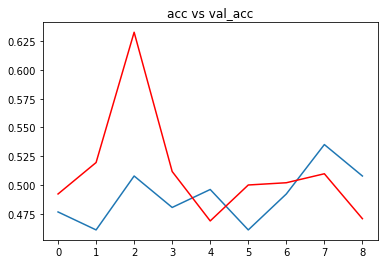

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")

plt.title("acc vs val_acc")
plt.show()

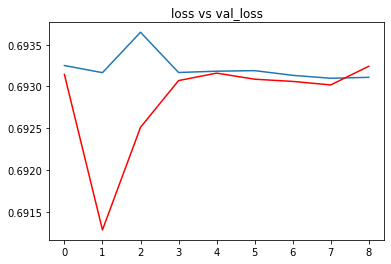

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c="red")

plt.title("loss vs val_loss")
plt.show()

In [ ]:
#Model accuracy

from keras.models import load_model
model = load_model("/content/bestmodel.h5")

Accuray

In [ ]:
acc= model.evaluate_generator(test_data)[1]

print(f"The accuracy of out model is {acc*100} %")

The accuracy of out model is 59.86577272415161 %


1/1 [==============================] - 0s 52ms/step


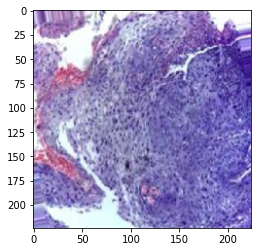

The image is normal and don't have a cancer 


In [ ]:
path ="/content/Pic_OralCancer/cancer/01960a64-cfe8-444d-bbc5-575c15389a21.jpg"
img = load_img(path, target_size = (224,224))
input_array = img_to_array(img)/255
plt.imshow(input_array)

input_array.shape
input_array = np.expand_dims(input_array, axis=0)


pred = model.predict(input_array)[0][0]
classes_x=np.argmax(pred,axis=0)

classes_x
plt.show()
if classes_x ==0:
  print("The image is normal and don't have a cancer ")
else:
  print("The image is having a cancer ")

In [ ]:
train_data.class_indices

{'oral_normal': 0, 'oral_scc': 1}